# **Linked List**  

# Singly Linked List

In [1]:
class Node:
    def __init__(self, val):
        self.val = val      # Store the node's value
        self.next = None    # Pointer to the next node (initially None)

class LinkedList:
    def __init__(self):
        self.head = None    # Pointer to the first node in the list
        self.tail = None    # Pointer to the last node in the list
    
    def push_front(self, val):
        """Insert a new node at the beginning of the list - O(1)"""
        new_node = Node(val)        # Create a new node
        new_node.next = self.head   # Point new node to current head
        self.head = new_node        # Update head to the new node
        
        # If list was empty, new node is also the tail
        if self.tail is None:
            self.tail = new_node
    
    def push_back(self, val):
        """Insert a new node at the end of the list - O(1) with tail pointer"""
        new_node = Node(val)        # Create a new node
        
        # If list is empty, new node is both head and tail
        if self.tail is None:
            self.head = new_node
            self.tail = new_node
        else:
            # Link current tail to new node
            self.tail.next = new_node
            # Update tail to the new node
            self.tail = new_node
    
    # def push_back(self, val):  
    # """Insert a new node at the end of the list - O(n) without tail pointer"""
    #     new_node = Node(val)

    #     if self.head is None:
    #         self.head = new_node
    #         return

    #     curr = self.head
    #     while curr.next:
    #         curr = curr.next
    #     curr.next = new_node
    
    
    def pop_front(self):
        """Remove and return the first node's value - O(1)"""
        # Check if list is empty
        if self.head is None:
            print("LL is Empty")
            return None
        
        val = self.head.val         # Store value to return
        self.head = self.head.next  # Move head to next node
        
        # If list becomes empty after removal, update tail
        if self.head is None:
            self.tail = None
            
        return val
    
    def pop_back(self):
        """Remove and return the last node's value - O(n)"""
        # Check if list is empty
        if self.head is None:
            print("LL is Empty")
            return None

        # Special case: only one element in the list
        if self.head == self.tail:
            val = self.head.val
            self.head = None
            self.tail = None
            return val
        
        # General case: traverse to second-to-last node
        temp = self.head
        while temp.next != self.tail:
            temp = temp.next
        
        val = self.tail.val         # Store value to return
        temp.next = None            # Remove link to tail
        self.tail = temp            # Update tail to second-to-last node
        return val
    
    def insert_position(self, val, pos):
        """Insert a new node at the specified position - O(n)"""
        new_node = Node(val)
        
        # Special case: insert at the beginning
        if pos == 0:
            self.push_front(val)
            return 

        # Traverse to the node before the insertion position
        temp = self.head
        for _ in range(pos - 1):
            if not temp:
                print("Position out of bounds")
                raise IndexError("Position out of bounds")
            temp = temp.next
        
        # Insert the new node
        new_node.next = temp.next   # New node points to next node
        temp.next = new_node        # Previous node points to new node
        
        # If inserted at end, update tail pointer
        if new_node.next is None:
            self.tail = new_node
    
    def search(self, val):
        """Search for a value and return its position, -1 if not found - O(n)"""
        temp = self.head
        pos = 0
        
        # Traverse the list
        while temp:
            if temp.val == val:
                return pos          # Return position if found
            temp = temp.next
            pos += 1
        
        return -1                   # Return -1 if not found
             
    def printll(self):
        """Print the entire linked list"""
        temp = self.head
        while temp is not None:
            print(f"{temp.val} ->", end=" ")
            temp = temp.next
        print("NULL")



In [2]:
# ========== Test Cases ==========

ll = LinkedList()
ll.printll()                    # Output: NULL

ll.push_front(1)                # Add 1 at front
ll.printll()                    # Output: 1 -> NULL

ll.push_front(2)                # Add 2 at front
ll.printll()                    # Output: 2 -> 1 -> NULL

ll.push_front(3)                # Add 3 at front
ll.printll()                    # Output: 3 -> 2 -> 1 -> NULL

ll.push_back(4)                 # Add 4 at back
ll.printll()                    # Output: 3 -> 2 -> 1 -> 4 -> NULL

ll.pop_front()                  # Remove from front (removes 3)
ll.printll()                    # Output: 2 -> 1 -> 4 -> NULL

ll.pop_back()                   # Remove from back (removes 4)
ll.printll()                    # Output: 2 -> 1 -> NULL

ll.insert_position(2.5, 1)      # Insert 2.5 at position 1
ll.printll()                    # Output: 2 -> 2.5 -> 1 -> NULL

print(f"Position of 2: {ll.search(2)}")  # Search for value 2
                                         # Output: Position of 2: 0

NULL
1 -> NULL
2 -> 1 -> NULL
3 -> 2 -> 1 -> NULL
3 -> 2 -> 1 -> 4 -> NULL
2 -> 1 -> 4 -> NULL
2 -> 1 -> NULL
2 -> 2.5 -> 1 -> NULL
Position of 2: 0


# **Reverse a Linked List**

- **Leetcode Problem Number:** 206 
- [Reverse Linked List](https://leetcode.com/problems/reverse-linked-list/)

#### Example:
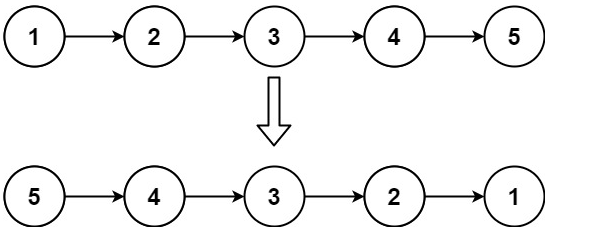

In [3]:
class Node:
    def __init__(self, val):
        self.val = val      # Store the node's value
        self.next = None    # Pointer to the next node (initially None)

class ReverseLinkedList:
    def __init__(self):
        self.head = None    # Pointer to the first node in the list
    
    def reverse(self):
        prev = None
        curr = self.head
        
        while curr:
            nxt = curr.next
            curr.next = prev
            
            prev = curr
            curr = nxt
        return prev
        

# **Middle of Linked List**
- **Leetcode Problem Number:** 876 
- [Middle Of Linked List](https://leetcode.com/problems/middle-of-the-linked-list/)

#### Example:
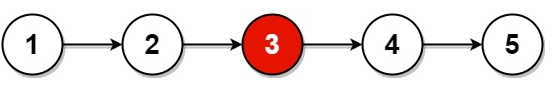

In [4]:
class Node:
    def __init__(self, val):
        self.val = val      # Store the node's value
        self.next = None    # Pointer to the next node (initially None)

class MiddleLinkedList:
    def __init__(self):
        self.head = None    # Pointer to the first node in the list
    
    def reverse(self):
        """Find middle using slow/fast pointers"""
        if not self.head:
            return None
        fast = slow = self.head
        while fast and fast.next:
            fast = fast.next.next
            slow = slow.next
        return slow   # Slow is at middle when fast reaches end

# **Cycle of Linked List**
- **Leetcode Problem Number:** 141 
- [Cycle Of Linked List](https://leetcode.com/problems/linked-list-cycle/)

#### Example:
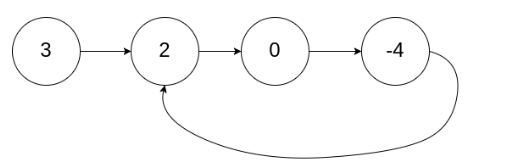

In [5]:
class Node:
    def __init__(self, val):
        self.val = val      # Store the node's value
        self.next = None    # Pointer to the next node (initially None)

class CycleLinkedList:
    def __init__(self):
        self.head = None    # Pointer to the first node in the list
    
    def has_cycle(self):
        """Find cycle using slow/fast pointers"""
        slow = fast = self.head
        
        while fast and fast.next:
            fast = fast.next.next
            slow = slow.next    
            if slow == fast:
                return True
        return False
        

# **Cycle of Linked List 2**
- **Leetcode Problem Number:** 142 
- [Cycle Of Linked List 2](https://leetcode.com/problems/linked-list-cycle-ii/)
- Return the node where cycle begins.

#### Example:
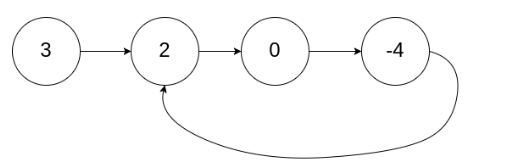
- Return `1`

- If you only want the start node (no removal)

In [6]:
class Node:
    def __init__(self, val):
        self.val = val      # Store the node's value
        self.next = next
class PosCycleLinkedList:
    """Return the node where a cycle begins, or None if no cycle exists."""
    def __init__(self):
        self.head = None    # Pointer to the first node in the list
    
    def cycle_pos(self):
        slow = fast = self.head

        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            if slow == fast:
                break
        else:
            return None  # No cycle

        slow = self.head
        while slow != fast:
            slow = slow.next
            fast = fast.next

        return slow

- If you want to find the start AND remove the cycle

In [7]:
class Node:
    def __init__(self, val):
        self.val = val      # Store the node's value
        self.next = None
class RemoveCycleLinkedList:
    """Remove the cycle from the LL, or None if no cycle exists."""
    def __init__(self):
        self.head = None    # Pointer to the first node in the list
        
    def remove_cycle(self):
        fast = self.head
        slow = self.head
        # Step 1: Detect cycle
        while fast and fast.next:
            fast = fast.next.next
            slow = slow.next
            if slow == fast:
                break
        else:
            return None # No cycle
        # Step 2: Find start of cycle
        slow = self.head
        prev = None 
        while slow!= fast:
            prev = fast
            slow = slow.next
            fast = fast.next
        # Step 3: Remove cycle
        prev.next = None
        return slow

# **Merge Two Sorted Linked Lists**
- **Leetcode Problem Number:** 21 
- [Merge Two Sorted Lists](https://leetcode.com/problems/merge-two-sorted-lists/)

#### Example:
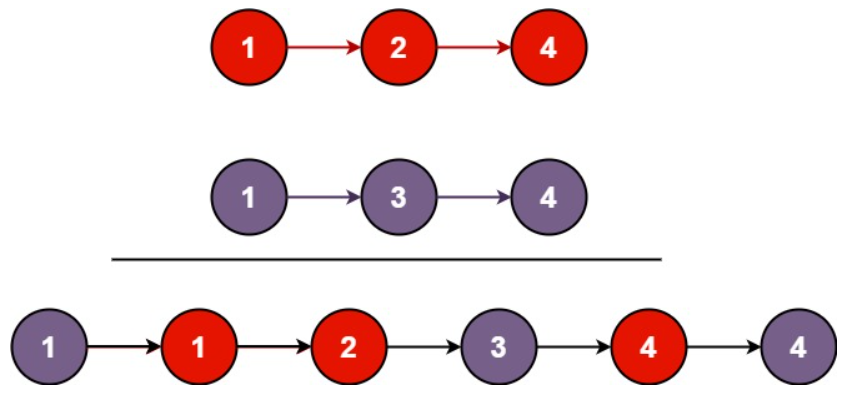


In [8]:
class Node:
    def __init__(self, val):
        self.val = val      # Store the node's value
        self.next = next
class MergeLinkedList:
    """Merge two sorted linked list in ascending fashion."""
    def __init__(self):
        self.head = None    # Pointer to the first node in the list
    
    def merge(self, list1, list2):
        dummy = Node(0)
        curr = dummy 
        while list1 and list2:
            if list1.val <= list2.val:
                curr.next = list1
                curr = list1
                list1 = list1.next
            else:
                curr.next = list2
                curr = list2
                list2 = list2.next
        curr.next = list1 if list1 else list2
        return dummy.next

# Doubly Linked List

In [9]:
class Node:
    """
    A single node in a doubly linked list.

    Attributes:
        val  : Data stored in the node
        next : Reference to the next node
        prev : Reference to the previous node
    """
    def __init__(self, val):
        self.val = val
        self.next = None
        self.prev = None


class DoublyLinkedList:
    """
    Doubly Linked List implementation.

    Maintains references to:
        head : First node in the list
        tail : Last node in the list

    Supports O(1) insertion and deletion
    from both ends of the list.
    """
    def __init__(self):
        self.head = None
        self.tail = None

    def push_front(self, val):
        """
        Insert a new node at the beginning of the list.
        Time Complexity: O(1)
        """
        newnode = Node(val)

        # If list is empty, head and tail both point to new node
        if self.head is None:
            self.head = self.tail = newnode
        else:
            # Attach new node before current head
            newnode.next = self.head
            self.head.prev = newnode
            self.head = newnode

    def push_back(self, val):
        """
        Insert a new node at the end of the list.
        Time Complexity: O(1)
        """
        newnode = Node(val)

        # If list is empty
        if self.tail is None:
            self.head = self.tail = newnode
        else:
            # Attach new node after current tail
            self.tail.next = newnode
            newnode.prev = self.tail
            self.tail = newnode

    def pop_front(self):
        """
        Remove and return the value of the first node.
        Time Complexity: O(1)
        """
        if self.head is None:
            print("DLL is Empty!")
            return None

        temp = self.head
        value = temp.val

        # Move head forward
        self.head = self.head.next

        # If list is not empty after removal
        if self.head is not None:
            self.head.prev = None
        else:
            # List became empty
            self.tail = None

        # Fully detach removed node
        temp.next = None
        del temp

        return value

    def pop_back(self):
        """
        Remove and return the value of the last node.
        Time Complexity: O(1)
        """
        if self.tail is None:
            print("DLL is Empty!")
            return None

        temp = self.tail
        value = temp.val

        # Move tail backward
        self.tail = self.tail.prev

        # If list is not empty after removal
        if self.tail is not None:
            self.tail.next = None
        else:
            # List became empty
            self.head = None

        # Fully detach removed node
        temp.prev = None
        del temp

        return value

    def get(self, pos):
        """
        Return the value at the given 1-based position.

        Example:
            get(1) -> first element
            get(2) -> second element

        Time Complexity: O(n)
        """
        if pos <= 0:
            print("Invalid index")
            return None

        curr = self.head
        index = 1

        # Traverse until desired position
        while curr and index < pos:
            curr = curr.next
            index += 1

        if curr is None:
            print("Index out of range")
            return None

        return curr.val

    def printdll(self):
        """
        Print the list from head to tail.
        """
        curr = self.head
        while curr:
            print(f"{curr.val} <-> ", end="")
            curr = curr.next
        print("NULL")


In [10]:
# Create an empty doubly linked list
dll = DoublyLinkedList()

dll.printdll()          # NULL
dll.push_front(3)
dll.printdll()          # 3 <--> NULL
dll.push_front(2)
dll.printdll()          # 2 <--> 3 <--> NULL
dll.push_front(1)
dll.printdll()          # 1 <--> 2 <--> 3 <--> NULL
dll.push_back(4)
dll.printdll()          # 1 <--> 2 <--> 3 <--> 4 <--> NULL
dll.pop_front()
dll.printdll()          # 2 <--> 3 <--> 4 <--> NULL
dll.pop_back()
dll.printdll()          # 2 <--> 3 <--> NULL

# Access element at position 2 (1-based index)
print(dll.get(2))       # Output: 3

NULL
3 <-> NULL
2 <-> 3 <-> NULL
1 <-> 2 <-> 3 <-> NULL
1 <-> 2 <-> 3 <-> 4 <-> NULL
2 <-> 3 <-> 4 <-> NULL
2 <-> 3 <-> NULL
3


# Circular Linked List

In [14]:
class Node:
    """
    A single node in a doubly linked list.

    Attributes:
        val  : Data stored in the node
        next : Reference to the next node
        prev : Reference to the previous node
    """
    def __init__(self, val):
        """
        Initialize a new node with the given value.
        
        Args:
            val: The data to be stored in the node
        """
        self.val = val      # Store the data value
        self.next = None    # Initialize next pointer as None
        self.prev = None    # Initialize previous pointer as None (not used in current implementation)
        

class CircularLinkedList:
    """
    A circular singly linked list implementation.
    
    In a circular linked list, the last node points back to the first node,
    forming a circle. This implementation maintains both head and tail pointers
    for efficient operations at both ends.
    
    Attributes:
        head: Reference to the first node in the list
        tail: Reference to the last node in the list
    """
    
    def __init__(self):
        """Initialize an empty circular linked list."""
        self.head = None  # Points to the first node
        self.tail = None  # Points to the last node
    
    def push_front(self, val):
        """
        Insert a new node at the beginning of the circular linked list.
        
        Args:
            val: The value to be inserted at the front
            
        Time Complexity: O(1)
        """
        newnode = Node(val)  # Create a new node with the given value
        
        if self.head is None:
            # Case 1: List is empty
            # Both head and tail point to the new node
            self.head = self.tail = newnode
            newnode.next = self.head  # Point to itself to maintain circularity
        else:
            # Case 2: List has existing nodes
            newnode.next = self.head      # New node points to current head
            self.head = newnode           # Update head to the new node
            self.tail.next = self.head    # Maintain circularity: tail points to new head
    
    def push_back(self, val):
        """
        Insert a new node at the end of the circular linked list.
        
        Args:
            val: The value to be inserted at the back
            
        Time Complexity: O(1)
        """
        newnode = Node(val)  # Create a new node with the given value
        
        if self.head is None:
            # Case 1: List is empty
            self.head = self.tail = newnode  # Both head and tail point to new node
            self.tail.next = newnode         # Point to itself to maintain circularity
        else:
            # Case 2: List has existing nodes
            newnode.next = self.head   # New node points to head (circular link)
            self.tail.next = newnode   # Current tail points to new node
            self.tail = newnode        # Update tail to the new node
            
    
    def pop_front(self):
        """
        Remove and delete the first node from the circular linked list.
        
        Returns:
            None
            
        Time Complexity: O(1)
        """
        if self.head is None:
            # Case 1: List is empty
            print("CLL is Empty")
            return None
        elif self.head == self.tail:
            # Case 2: List has only one node
            # Simply reset head and tail to None
            self.head = self.tail = None
        else:
            # Case 3: List has multiple nodes
            temp = self.head              # Store reference to current head
            self.head = temp.next         # Move head to the next node
            self.tail.next = self.head    # Maintain circularity: tail points to new head
            temp.next = None              # Disconnect the old head
            del temp                      # Delete the old head node
    
    def pop_back(self):
        """
        Remove and delete the last node from the circular linked list.
        
        Returns:
            None
            
        Time Complexity: O(n) - needs to traverse to find second-to-last node
        """
        if self.head is None:
            # Case 1: List is empty
            print("CLL is Empty")
            return None
        elif self.head == self.tail:
            # Case 2: List has only one node
            self.head = self.tail = None
        else:
            # Case 3: List has multiple nodes
            prev = self.head  # Start from head
            temp = self.tail  # Store reference to current tail
            
            # Traverse to find the second-to-last node
            while (prev.next != self.tail):
                prev = prev.next
            
            self.tail = prev              # Update tail to second-to-last node
            self.tail.next = self.head    # Maintain circularity: new tail points to head
            temp.next = None              # Disconnect the old tail
            del temp                      # Delete the old tail node
    
    def printcll(self):
        """
        Print all elements in the circular linked list.
        
        Traverses the list once and displays all values in order,
        showing the circular connection back to the head.
        
        Time Complexity: O(n)
        """
        if self.head is None:
            print("CLL is empty")
            return
        
        temp = self.head  # Start from the head
        
        # Traverse the circular list
        while True:
            print(temp.val, end="->")  # Print current node's value
            temp = temp.next           # Move to next node
            
            if temp == self.head:      # Stop when we circle back to head
                break
        
        print(f"{self.head.val} (circular)")  # Indicate it loops back to head

In [15]:
# Create a new circular linked list instance
cll = CircularLinkedList()

# Insert 5 at the front: List becomes: 5
cll.push_front(5)
cll.printcll()

# Insert 4 at the front: List becomes: 4->5
cll.push_front(4)
cll.printcll()

# Insert 3 at the front: List becomes: 3->4->5
cll.push_front(3)
cll.printcll()

# Insert 6 at the back: List becomes: 3->4->5->6
cll.push_back(6)
cll.printcll()

# Remove from front: List becomes: 4->5->6
cll.pop_front()
cll.printcll()

# Remove from back: List becomes: 4->5
cll.pop_back()
cll.printcll()

5->5 (circular)
4->5->4 (circular)
3->4->5->3 (circular)
3->4->5->6->3 (circular)
4->5->6->4 (circular)
4->5->4 (circular)


# **Flatten Doubly Linked Lists**
- **Leetcode Problem Number:** 430
- [Flatten a Multilevel Doubly Linked List](https://leetcode.com/problems/flatten-a-multilevel-doubly-linked-list/)

#### Example:
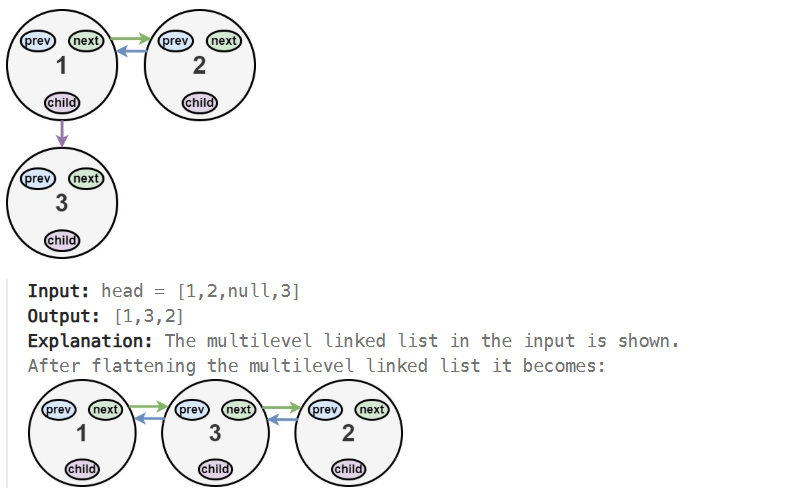


In [13]:
def flatten(self, head):
        # Check if the list is empty
        if not head:
            return None  # Return None for empty list
        # Start traversal from the head of the list
        curr = head
        # Traverse through each node in the list
        while curr:
            # Check if current node has a child list
            if curr.child:
                # Save the next node to reconnect later (might be None)
                temp = curr.next
                # Start at the beginning of the child list
                tail = curr.child
                # Find the last node (tail) of the child list
                while tail.next:
                    tail = tail.next  # Move to next node in child list
                # Connect current node to its child (forward direction)
                curr.next = curr.child
                # Connect child back to current node (backward direction)
                curr.child.prev = curr
                # Connect tail of child list to saved next node (forward direction)
                tail.next = temp
                # If there was a next node, connect it back to tail (backward direction)
                if temp:
                    temp.prev = tail
                # Remove the child pointer (child is now in main list)
                curr.child = None
            # Move to the next node in the list
            curr = curr.next
        # Return the head of the flattened list
        return head